# Dataset URL

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Problem Statement

The concerned hospital wants to know that wether the patients they have enrolled in their
data base has a heart disease or not automatically. To change the process into automation the 
hospital has provided me with the patients information to identify which patient has a heart disease
or not.
By doing this it will help the hospitals to identify who has the disease and what precautions
should be taken.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

I am using the pd.read_csv library to read the dataset 

In [2]:
arty = pd.read_csv(r'F:\Masters\Methods of Prediction\Projects\Heart Disease Predictions\archive\heart.csv')

Here im displaying the upper part of the dataset by using .head() built-in library

In [3]:
arty.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Im using .tail() built-in function to display the lower part of the dataset

In [4]:
arty.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Here im using the .info() built-in function to display the information regarding the datset which includes 
the datatypes of the columns, Non null counts, indexes and column names

In [5]:
arty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Here im using the built-in function .describe() to display the detailed discription of the dataset

In [6]:
arty.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here i am checking numerical values here im using .isnull() function to check the null numerical values and then show the sum of the null numerical values by using .sum() function 

In [7]:
arty.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Splitting Datasets

Here i am seperating the target variable from the dataset for training and testing 

In [8]:
y = arty["target"]
x = arty.drop('target', axis = 1)
x_learn, x_eval, y_learn, y_eval = train_test_split(x, y, test_size=0.25, random_state=42)

Here i am using the built-in function 'StandardScaler' to standardize my training and tseting datasets

In [9]:
scale = StandardScaler()
x_learn = scale.fit_transform (x_learn)
x_eval = scale.transform (x_eval)

# Applying ML Algorithms

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

Selection the best parameter for the LR classifier to predict the best results 


### Hyperparameter Tuning 

In [11]:
lg = LogisticRegression() 
params = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}

gs = GridSearchCV(lg, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
0.9226055736101397
LogisticRegression(C=0.1)
{'C': 0.1, 'penalty': 'l2'}


After Hyperparameter selection, training the LR classifier to present the best results

### Training LR after Hyperparameter Tuning

<AxesSubplot:>

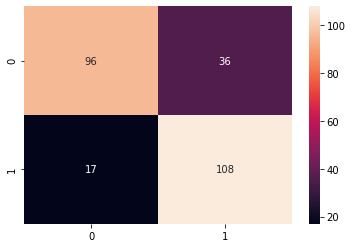

In [12]:
lg =LogisticRegression(C=0.1,penalty='l2')
lg.fit(x_learn, y_learn)
y_pred_lg = lg.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_pred_lg)
sns.heatmap(cm, annot=True, fmt="d")

After training the LR classifier, checking the performance of the classifier on the given dataset

### Performance of LR

After training the LR classifier, checking the performance of the classifier on the given dataset

In [13]:
print('Accuracy',accuracy_score((y_eval), y_pred_lg) * 100)
print('Precision',precision_score(y_eval, y_pred_lg, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_lg, average='macro') * 100)

Accuracy 79.37743190661479
Precision 79.97787610619469
Recall 79.56363636363636


## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

Here i am training the Naive Bayes classifier to present the best results 



Accuracy of Naive Bayes model: 79.37743190661479 

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



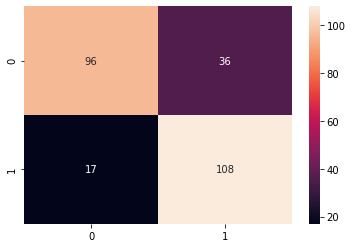

In [15]:
nb = GaussianNB()
nb.fit(x_learn,y_learn)
y_pred_nb = nb.predict(x_eval)
nb_conf_matrix = confusion_matrix(y_eval, y_pred_nb)
sns.heatmap (nb_conf_matrix, annot = True, fmt = 'd')
nb_acc_score = accuracy_score(y_eval, y_pred_nb)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_eval,y_pred_nb))

### Performance of Naive Bayes

After training the Naive Bayes classifier, checking the performance of the classifier on the given dataset

In [16]:
print('Accuracy:',accuracy_score((y_eval), y_pred_nb) * 100)
print('Precision:',precision_score(y_eval, y_pred_nb, average='macro') * 100)
print('Recall:',recall_score(y_eval, y_pred_nb, average='macro') * 100)

Accuracy: 79.37743190661479
Precision: 79.97787610619469
Recall: 79.56363636363636


## Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

Selection the best parameter for the RFC classifier to predict the best results 

### Hyperparameter Tuning 

In [18]:
rfc = RandomForestClassifier() 
params = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(rfc, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
0.9948074787115881
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


### Training RFC after Hyperparameter Tuning

After Hyperparameter selection, training the RFC classifier to present the best results

<AxesSubplot:>

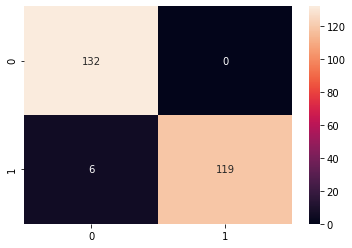

In [19]:
rfc = RandomForestClassifier(criterion='gini', max_depth=8, max_features='log2',
                       n_estimators=200)
rfc.fit(x_learn, y_learn)
y_pred_rfc = rfc.predict(x_eval)

# confusion_matrix
cm = confusion_matrix(y_eval, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of RFC

After training the RFC classifier, checking the performance of the classifier on the given dataset

In [20]:
print('Accuracy',accuracy_score((y_eval), y_pred_rfc) * 100)
print('Precision',precision_score(y_eval, y_pred_rfc, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_rfc, average='macro') * 100)

Accuracy 97.66536964980544
Precision 97.82608695652173
Recall 97.6


## KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

### Hyperparameter Tuning 

Selection the best parameter for the KNN classifier to predict the best results 

In [22]:
params = {'n_neighbors':range(1,20),"metric":["euclidean", "manhattan"],
              'algorithm' :['ball_tree','kd_tree','brute']
        
             }
knn=KNeighborsClassifier()
gs = GridSearchCV(knn, param_grid= params, cv = 5,scoring = "roc_auc",verbose=1)
gs.fit(x_learn, y_learn)
print(gs.best_score_)
print(gs.best_estimator_)
print(gs.best_params_)

Fitting 5 folds for each of 114 candidates, totalling 570 fits
0.9671644761199556
KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=1)
{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 1}


### Training KNN after Hyperparameter Tuning 

After Hyperparameter selection, training the KNN classifier to present the best results

<AxesSubplot:>

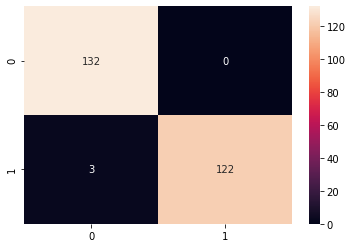

In [23]:
knn = KNeighborsClassifier(algorithm='ball_tree', metric='euclidean', n_neighbors=1)
knn.fit(x_learn, y_learn)
y_pred_knn = knn.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of KNN

After training the KNN classifier, checking the performance of the classifier on the given dataset

In [24]:
print('Accuracy',accuracy_score((y_eval), y_pred_knn)* 100)
print('Precision',precision_score(y_eval, y_pred_knn, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_knn, average='macro') * 100)

Accuracy 98.83268482490273
Precision 98.88888888888889
Recall 98.8


## Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter Tuning 

Selection the best parameter for the DTC classifier to predict the best results 

In [26]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_learn, y_learn)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [27]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=1024)

### Training DTC after Hyperparameter Tuning

After Hyperparameter selection, training the DTC classifier to present the best results

<AxesSubplot:>

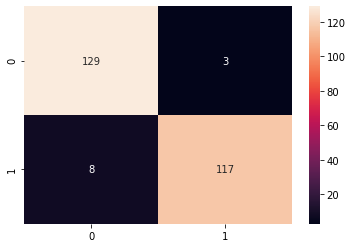

In [28]:
dt =DecisionTreeClassifier(ccp_alpha=0.001, criterion='gini', max_depth=9,
                       max_features='auto', random_state=1024)
dt.fit(x_learn, y_learn)
y_pred_dt = dt.predict(x_eval)
# confusion_matrix
cm = confusion_matrix(y_eval, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d")


### Performance of DTC

After training the DTC classifier, checking the performance of the classifier on the given dataset

In [29]:
print('Accuracy',accuracy_score((y_eval), y_pred_dt) * 100)
print('Precision',precision_score(y_eval, y_pred_dt, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_dt, average='macro') * 100)

Accuracy 95.71984435797665
Precision 95.83029197080292
Recall 95.66363636363637


## Support Vector Classifier 

In [30]:
from sklearn.svm import SVC

### Hyperparameter Tuning 

Selection the best parameter for the SVC classifier to predict the best results 

In [31]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_learn, y_learn)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.908 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.883 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [32]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)


### Training SVC after Hyperparameter Tuning

After Hyperparameter selection, training the SVC classifier to present the best results

<AxesSubplot:>

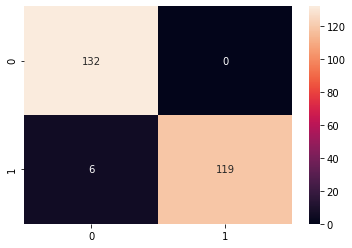

In [33]:
svc = SVC(kernel = 'rbf', C = 100, gamma = 0.1)
svc.fit (x_learn, y_learn)
y_pred_svc = svc.predict (x_eval)

cm = confusion_matrix(y_eval, y_pred_svc)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of SVC

After training the SVM classifier, checking the performance of the classifier on the given dataset

In [34]:
print('Accuracy',accuracy_score((y_eval), y_pred_svc) * 100)
print('Precision',precision_score(y_eval, y_pred_svc, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_svc, average='macro') * 100)

Accuracy 97.66536964980544
Precision 97.82608695652173
Recall 97.6


## MLP Classifier

In [35]:
from sklearn.neural_network import MLPClassifier

### Hyperparameter Tuning

Selection the best parameter for the MLP classifier to predict the best results 

In [36]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [37]:
grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs= -1, cv=5)
grid.fit(x_learn, y_learn)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 150, 'solver': 'adam'}


### Training MLP after Hyperparameter Tuning 

After Hyperparameter selection, training the MLP classifier to present the best results

<AxesSubplot:>

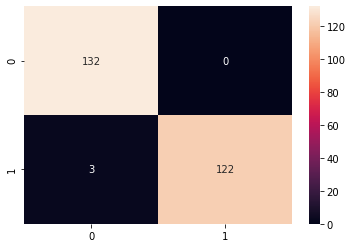

In [38]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(120,80,40), alpha = 0.05,
                        max_iter = 150,activation = 'relu', learning_rate = 'constant',
                        solver = 'adam')

mlp_clf.fit(x_learn, y_learn)
y_pred_mlp = mlp_clf.predict(x_eval)

cm = confusion_matrix(y_eval, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt="d")

### Performance of MLP

After training the MLP classifier, checking the performance of the classifier on the given dataset

In [39]:
print('Accuracy',accuracy_score((y_eval), y_pred_mlp) * 100)
print('Precision',precision_score(y_eval, y_pred_mlp, average='macro') * 100)
print('Recall',recall_score(y_eval, y_pred_mlp, average='macro') * 100)

Accuracy 98.83268482490273
Precision 98.88888888888889
Recall 98.8


## ROC Curve

I have made a ROC Curve and the prupose of making the ROC Curve is to
analyze the overall diagonistic performance of a test set and can be used to
comare more than two test sets and after that i have graphically shown the 
ROC Curve

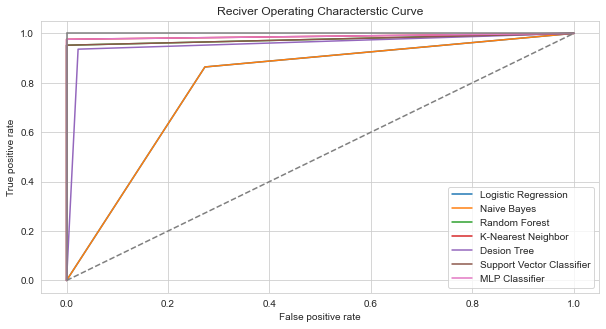

In [40]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_eval,y_pred_lg)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_eval,y_pred_nb)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_eval,y_pred_rfc)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_eval,y_pred_knn)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_eval,y_pred_dt)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_eval,y_pred_svc)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(y_eval,y_pred_mlp)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='MLP Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [41]:
all_models = pd.DataFrame({'Model': ['Logistic Regression',
                                     'Naive Bayes', 
                                     'MLP Classifier' ,
                                     'Random Forest',
                                     'K-Nearest Neighbour',
                                     'Decision Tree',
                                     'Support Vector Machine'], 
                           'Accuracy': [accuracy_score((y_eval), y_pred_lg) * 100,
                                        nb_acc_score*100, 
                                        accuracy_score((y_eval), y_pred_mlp) * 100 ,
                                        accuracy_score((y_eval), y_pred_rfc) * 100,
                                        accuracy_score((y_eval), y_pred_knn)* 100,
                                        accuracy_score((y_eval), y_pred_dt) * 100,
                                        accuracy_score((y_eval), y_pred_svc) * 100]})

print ("\nPrinting the Accuracy of all the models alltogether:")
all_models


Printing the Accuracy of all the models alltogether:


,Model,Accuracy
0,Logistic Regression,79.377432
1,Naive Bayes,79.377432
2,MLP Classifier,98.832685
3,Random Forest,97.665370
4,K-Nearest Neighbour,98.832685
5,Decision Tree,95.719844
6,Support Vector Machine,97.665370


## Ensemble Learning

In [42]:
from mlxtend.classifier import StackingCVClassifier

Here Im selecting 4 models for the Ensemble learning model to evalute and show the best results

In [43]:
scv=StackingCVClassifier(classifiers=[dt,knn,mlp_clf],meta_classifier= svc,random_state=42)
scv.fit(x_learn, y_learn)
scv_predicted = scv.predict(x_eval)
scv_conf_matrix = confusion_matrix(y_eval, scv_predicted)
scv_acc_score = accuracy_score(y_eval, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_eval,scv_predicted))

confussion matrix
[[132   0]
 [  3 122]]


Accuracy of StackingCVClassifier: 98.83268482490273 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



### Performance of Ensemble Learning

After training the Ensemble , checking the performance of the learning classifier on the given dataset

In [44]:
print('Accuracy:',accuracy_score((y_eval), scv_predicted)* 100)
print('Precision:',precision_score(y_eval, scv_predicted, average='macro') * 100)
print('Recall:',recall_score(y_eval, scv_predicted, average='macro') * 100)

Accuracy: 98.83268482490273
Precision: 98.88888888888889
Recall: 98.8


In [ ]:
Strengths of the dataset:
    The dataset is very informative. It contains all the necessary variables which are 
    required to predict wether the patient has heart disease or not. There are no errors in the dataset wahtsoever which helps us 
    to read the dataset easily. All the data is numeric due to which it was easy for me to train all the modeles 
    i used.
    
Limitations of the dataset:
    The dataset could have more features and elements so that it can trained with the models more accuratly
    and then the prediction would be more precise.
    
Informative Features:
    The most informative features of the dataset are the columns target and age.

Model:
    I have used 6 Machine Learning model to train on my dataset and before training i have selected 
    the hyperparameter which will be best according to ML algorithms I have used and then after that 
    i have calculated the acurracy of the models and the classification report for each ML Algorithm.
    